# **Capstone project: Salifort Motors Data-driven suggestions for HR**

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. As a data analytics professional,provide data-driven suggestions based on understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals of this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize with the HR dataset

The dataset that used contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

The HR department of Salifort Motors will be our main stakeholders. The model we are building has an objective of identifying employees who are leaving, and thus, will in turn also help the company identify factors that contribute to this high turnover rate. By understanding the factors that causes the problem, the company will be able to better address the problem and come up with a suitable solution to increase employee retention and help the company cut costs on new hires.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [57]:
# Import packages
### YOUR CODE HERE ### 

# Manipulations
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

# Models & Metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.metrics import precision_score, accuracy_score, roc_auc_score,\
f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Saving
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0= df0.rename(columns={'Work_accident' : 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()==True].sort_values('satisfaction_level').head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12651,0.09,0.88,6,269,4,0,1,0,technical,medium
14233,0.09,0.95,6,304,4,0,1,0,sales,low
12094,0.09,0.83,6,255,4,0,1,0,sales,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12407,0.09,0.94,6,257,4,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0= df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df0.duplicated().sum())
df0.head()

0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

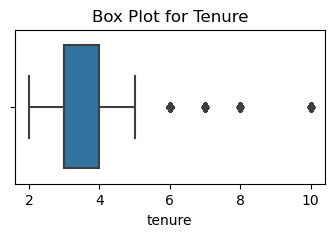

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(4,2))
sns.boxplot(data=df0, x='tenure')
plt.title("Box Plot for Tenure")
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1= df0['tenure'].quantile(0.25)
q3= df0['tenure'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + 1.5 * iqr
lower_limit= q1 - 1.5 * iqr

outliers= df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]

outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When getting to the stage of building the model, consider whether to remove outliers, based on the type of model that is to be used.

# Analyze Stage
- Perform EDA (analyze relationships between variables)



Based on previous exploraory data anlysis:
- There is some correlation betweeen monthly hours, number of projects, and evaluation scores. Most employees who left are overworked or have much higher monthly hours but no promotion.
- Most employees worked more than 165 hours, with increasing working hours not guaranteeing any increase in evaluation score. There are two categories of leaving employee: less work emploees and overworked employees with low chance f promotion or lower appreciation. Generally employees who left have lower satisfaction levels.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("Number of people who left(1)/have not left(0): ", df0['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("\nPercentage of people who left(1)/have not left(0): ", df0['left'].value_counts(normalize=True)*100)

Number of people who left(1)/have not left(0):  left
0    10000
1     1991
Name: count, dtype: int64

Percentage of people who left(1)/have not left(0):  left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


Although the class distribution is not the most balanced, 83-17 is still an acceptable distribution. Thus, there is no need for resaples in this case.

### Data visualizations

Now, examine variables that is of interest, and create plots to visualize relationships between variables in the data.

In [14]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [15]:
# average Satisfaction levels among the Left Status
df0.groupby('left')['satisfaction_level'].mean()

left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64

According to the stats, employees who left have lower satisfaction levels compared to those staying in the company.

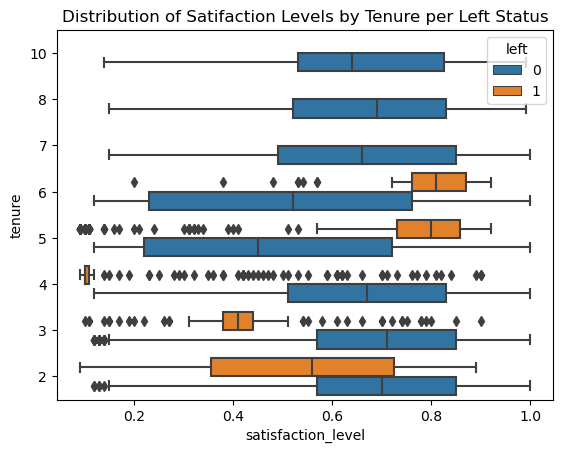

In [16]:
# Create a plot as needed, Satisfaction levels by Tenure per left status
### YOUR CODE HERE ###
sns.boxplot(data=df0, x='satisfaction_level', y='tenure', hue='left', orient='h').invert_yaxis()
plt.title("Distribution of Satifaction Levels by Tenure per Left Status")
plt.show()

Based on the boxplot above, several insights can be gleamed:
* Employees who stayed seemed to experience a fairly stable average satisfaction level throughout the 10 years, with a considerable dip in the 5th and 6th year. (This observation may be worth going deeper into)
* Employees who left however seemed to be divided into two categories. Those who left early (2nd-4th year) with low satisfaction levels and employees who left later (5th/6th year) with very high satisfaction levels.
* According to the plots, it can also be observed that year 4 has an unusally low satisfaction level among eployees who left and employees who did not leave have also seen a decrease in satisfaction level beginning with year 4. It might be worth investigating what happened in the company or if there are any policies causing major dissatisfaction among employees.
* Finally, employees who have the longest tenures 7-10 years are still within the company with none leaving, while showing a satisfaction level similar to newcomers. Potential reasons may include higher positions, status, salaries, or perhaps psychological factors which might be worth investigating deeper.

Text(0.5, 1.0, 'Distribution of Employee per Tenure')

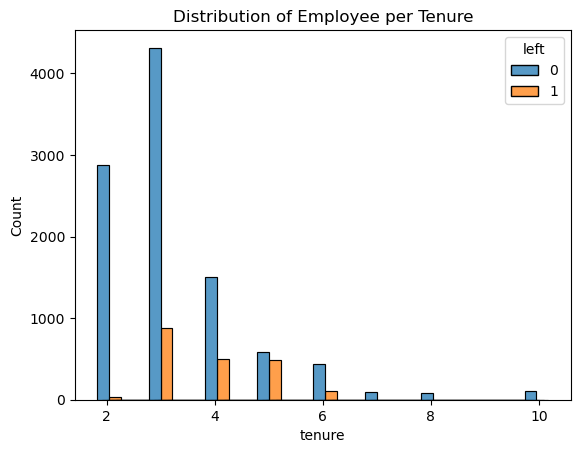

In [17]:
# Create a plot as needed, Number of Employees per Tenure
### YOUR CODE HERE ###
sns.histplot(data=df0, x='tenure', hue='left', multiple='dodge', shrink=5)
plt.title("Distribution of Employee per Tenure")

Continuing from previous observations:
* It is likely that the older employees with highest tenures have higher positions and salaries as there are only very few of them according to the histogram.
* Although the count of employees who left in the 3rd year is highest, however when taking into accoun the employees who did not leave, it is more worth investigating the 4th and 5th year where employees who left accounts for nearly 1/3 of the employees (year 4) and nearly 1/2 of the employees (year 5).

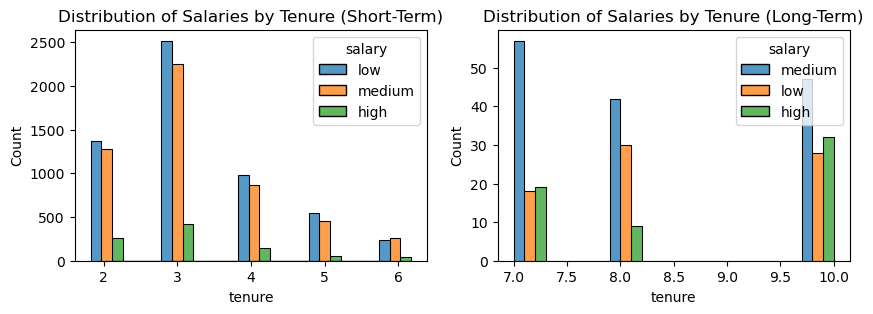

In [18]:
# Create a plot as needed, Salary range per tenure (Short vs Long Tenure)
### YOUR CODE HERE ###
fig, ax= plt.subplots(1,2, figsize=(10,3))

sns.histplot(data=df0[df0['tenure']< 7], x='tenure', hue='salary', multiple='dodge', shrink=5, ax=ax[0])
ax[0].set_title("Distribution of Salaries by Tenure (Short-Term)")

sns.histplot(data=df0[df0['tenure']>= 7], x='tenure', hue='salary', multiple='dodge', ax=ax[1])
ax[1].set_title("Distribution of Salaries by Tenure (Long-Term)")

plt.show()

Contrary to what was expected according to previous observations, long tenured employees are not disproportionately comprised of high salary employees. But still, compared to earlier years, it can be clearly observed that higher paid employes stayed longer. This indicates that there are other factors that leads to long tenured employees' loyalty apart from postion and salaries.

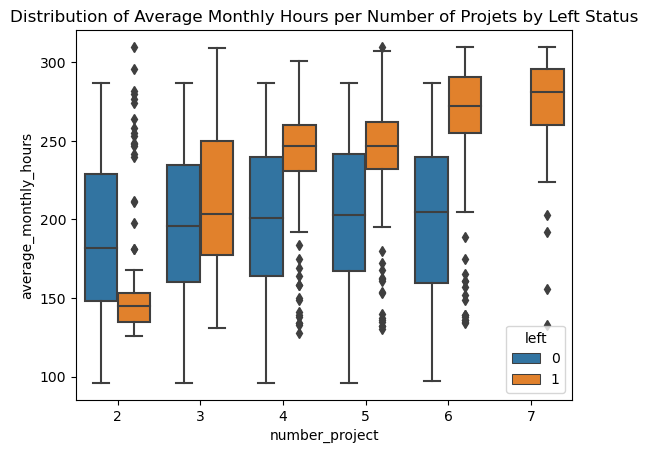

In [19]:
# Create a plot as needed, Distribution of Average Monthly Hours per Number of Projects 
### YOUR CODE HERE ###
sns.boxplot(data=df0, x='number_project', y='average_monthly_hours', hue='left')
plt.title("Distribution of Average Monthly Hours per Number of Projets by Left Status")
plt.show()

According to the boxplot, it can be seen that as number of projects increase, the average monthly hours also increase in general, especially for employees who left. Employees staying did not experience as much change in working hours from additional projects compared to employees who left. Apart from leaving employees with 2 projects, all other project numbers' leaving employees experienced significantl higher working hours. Thus, we can again conclude that there is 2 categories of leavng employees, less work/project employees and overworked more project employees. Next, we will check the monthly hours against evaluation results. 

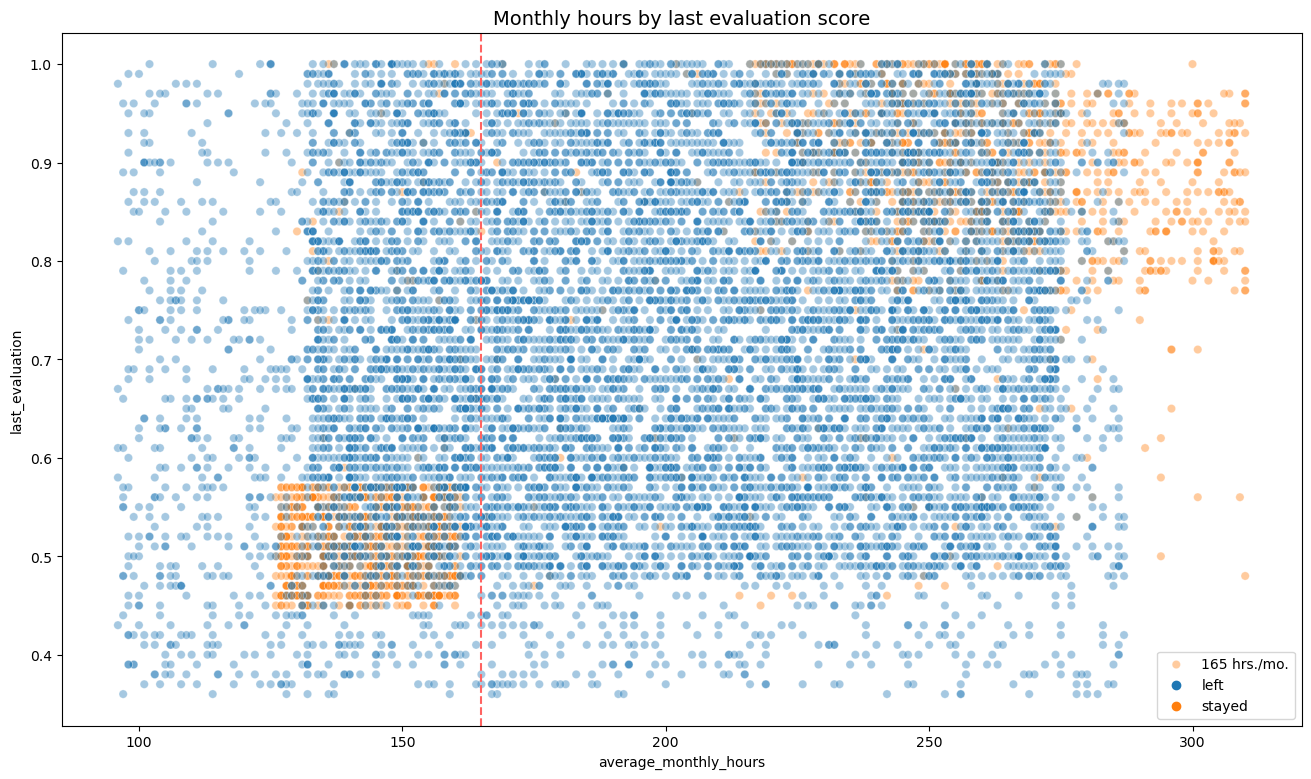

In [20]:
# Create a plot as needed, Average Monthly Hours vs Evaluation per Left Status
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=165, color='#ff6361', label='165 hrs./mo.', ls='--')
plt.legend(labels=['165 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

According to this scatterplot:
* There is again 2 categories of employees who left, those with low monthly hours and lower evaluation & those with very high monthly hours and high evaluations. The two categories can be respectively labeled as less work low-performing employees & overworked high_performing employees, this trend is similar to the previous boxplot.
* Most employees of the company works more than 165 hours monthly.
* The plot also suggest that high working hours does not mean high evaluation scores.

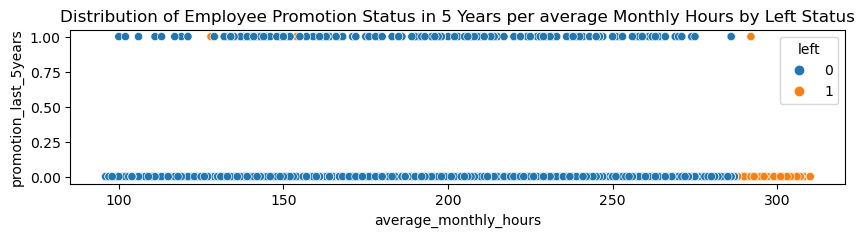

In [21]:
# Create a plot as needed, Working Hours and Promotion per Left Status
### YOUR CODE HERE ###
plt.figure(figsize=(10,2))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.title("Distribution of Employee Promotion Status in 5 Years per average Monthly Hours by Left Status")
plt.show()

The plot above reveals the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

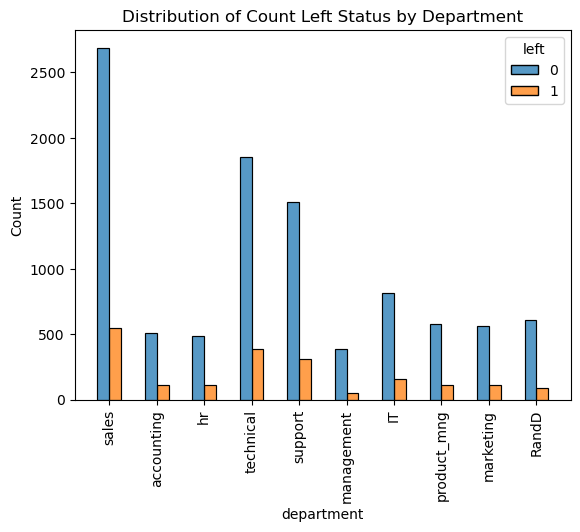

In [22]:
# Create a plot as needed, Left Count per Department
### YOUR CODE HERE ###
sns.histplot(data=df0, x='department', hue='left', multiple='dodge', discrete=1, shrink=0.5)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.title("Distribution of Count Left Status by Department")
plt.show()

According to the plot, there is no specific department where turnover's proportion is particularly large or small. The proportion of employees who left and stays are similar accross all departments. 

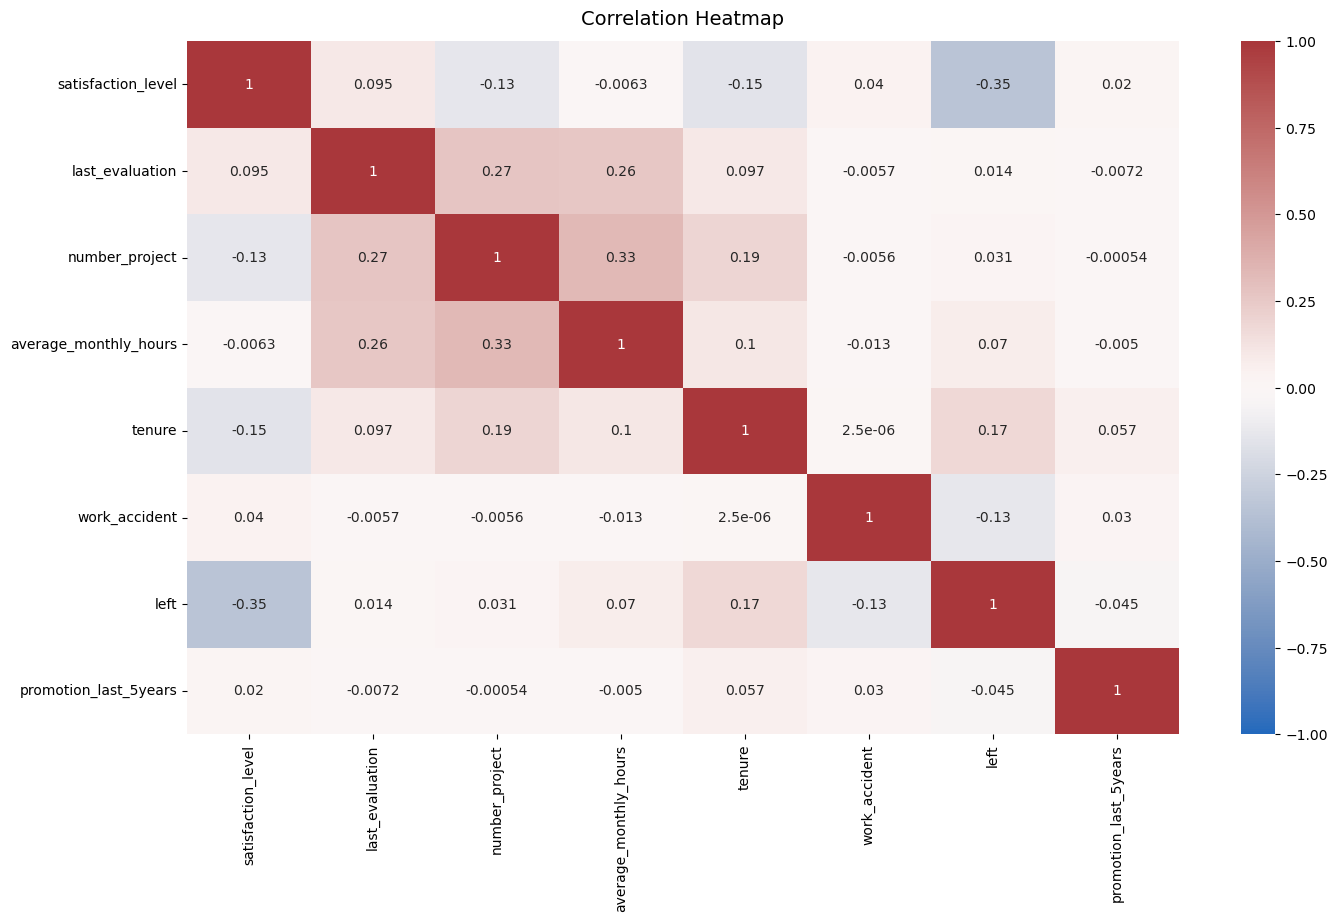

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

According to the visualizations, it can be inferred that:
* Most employees who left have very high working hours, more projects, no promotion, and lower satisfaction levels. This may indicate the company's poor employee and talent management.
* Most employees who worked longer than 6 years tend to stay with the company with a significant proportion being higher salary employees, although not to a disproportionate number.

# Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building & Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the outcome variable is categorical binomial value, we can build either a logistic regression or tree-based ML model.
We will proceed with both models, evaluate their performance and proceed with testing on the champion model.

### Modeling : Logistic Regression
We will begin with turning categorical variables to numerical values.

In [24]:
### YOUR CODE HERE ###

# Copy the dataframe
df_enc = df0.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Next, we will ensure that there is no severe multicollinearity or outliers.

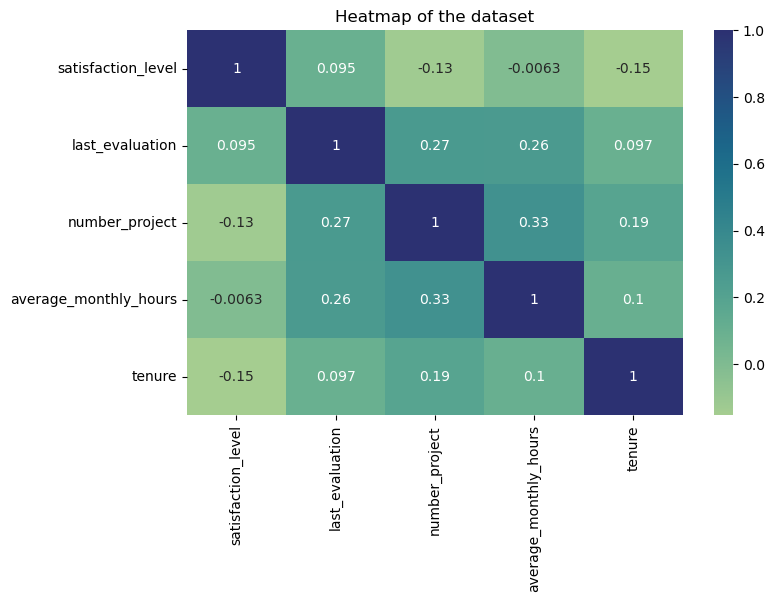

In [25]:
# Heatmap of correlations
plt.figure(figsize=(8, 5))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [26]:
# Removing Outliers from tenure, selecting only those within the limits
df_enc= df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Isolate outcome and independent variables, split training and testing data, and Modelling

In [27]:
# Isolate y and X variables
y= df_enc['left']
X= df_enc.drop(columns=['left'], axis=1)

In [28]:
# Split training and testing data
X_tra, X_test, y_tra, y_test= train_test_split(X, y, test_size= 0.25, stratify=y, random_state=42)

In [29]:
# Split training and validation data
X_train, X_val, y_train, y_val= train_test_split(X_tra, y_tra, test_size= 0.25, stratify= y_tra, random_state=42)

In [30]:
# Construct logistic regression model and fit model with training data
log_clf= LogisticRegression(random_state= 42, max_iter= 500).fit(X_train, y_train)

Evaluate results and its scores

In [31]:
# Make predictions with the model
y_pred= log_clf.predict(X_val)

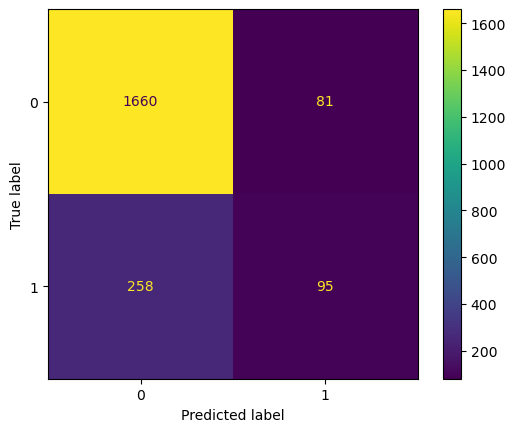

In [58]:
# Confusion Matrix
cm= confusion_matrix(y_val, y_pred)

log_disp= ConfusionMatrixDisplay(cm, display_labels= log_clf.classes_)

log_disp.plot()
plt.show()

In [59]:
# Create classification report
target_labels= ['Not Leave', 'leave']
print(classification_report(y_val, y_pred, target_names= target_labels))

              precision    recall  f1-score   support

   Not Leave       0.87      0.95      0.91      1741
       leave       0.54      0.27      0.36       353

    accuracy                           0.84      2094
   macro avg       0.70      0.61      0.63      2094
weighted avg       0.81      0.84      0.81      2094



In [34]:
# Take into account class balance as it will help us interpret the classification report scores
df_enc['left'].value_counts(normalize=True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

According to the classification report, the logistic regression model achieved a precision of 81%, recall of 84%, f1-score of 81% (all weighted averages), and accuracy of 84%. However, if it's most important to predict employees who leave, that would mean that recall score is prioritized. Comparing the scores with the class balanced, we can conclude that the recall score is quite low for the model.

### Modeling: Tree-Based ML

Decision Tree and Random Forests

Before we begin constructing the model, let use go through feature engineering. Recall that employees who left were often overworked employees. This variable may be a good predictor for the decision tree. Thus, we can create a new data column to identify whether an employee is overworked. 

According to [hubstaff](https://hubstaff.com/blog/working-days-in-a-month/#:~:text=There%20are%2020%20to%2022,if%20holidays%20fall%20in%20them.), the average working hours of an employee working full-time or eight hours per day is between 160 to 176 hours every month. We shall use 176 as the threshold of whether one is overworked or not.

In [35]:
# Create new Overworked column, 0 for false and 1 for true
df1= df_enc.copy()
df1['Overworked']= (df1['average_monthly_hours'] > 176).astype(int)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,Overworked
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


Next, we will isolate the outcome and independent variabled y and X. Then, we will split the training, validation, and test data.

In [36]:
# Isolate y and X
y= df1['left']

X= df1.copy().drop(columns=['left'], axis=1)

In [37]:
# Split training and testing data
X_tra, X_test, y_tra, y_test= train_test_split(X, y, test_size= 0.25, stratify=y, random_state=42)

In [38]:
# Split training and validation data
X_train, X_val, y_train, y_val= train_test_split(X_tra, y_tra, test_size= 0.25, stratify=y_tra, random_state=42)

In [92]:
# Untuned Result table maker function
def get_results(model_name, y_val, y_pred):
    
    # Extract accuracy, precision, recall, f1, roc auc score
    f1= f1_score(y_val, y_pred)
    accuracy= accuracy_score(y_val, y_pred)
    precision= precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    roc_auc= roc_auc_score(y_val, y_pred)
    
    #Create table of results
    table= pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'AUC': [roc_auc]})
    return table

In [78]:
# CV Result table maker function
def make_results(model_name, model_object, metric):

    # Get all the results from the CV and put them in a df
    scoring_df= pd.DataFrame(model_object.cv_results_)
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Isolate the row of the df with the max(mean f1 score
    best_estimator_results = scoring_df.iloc[scoring_df[metric_dict[metric]].idxmax(), :]
    
    # Extract accuracy, precision, recall, f1, roc auc score from that row
    f1= best_estimator_results.mean_test_f1
    accuracy= best_estimator_results.mean_test_accuracy
    precision= best_estimator_results.mean_test_precision
    recall= best_estimator_results.mean_test_recall
    roc_auc= best_estimator_results.mean_test_roc_auc

    # Create table of results
    table= pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'AUC': [roc_auc]})
    
    return table

#### Decision Tree

In [39]:
# Initialize model and fit
dt= DecisionTreeClassifier(random_state= 42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
# Check results
dt_pred= dt.predict(X_val)
dt_results= get_results("Decision Tree", y_val, dt_pred)
dt_results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.90678,0.968481,0.904225,0.909348,0.94491


The decision tree has actually done very well in classifying employees who will leave and not leave. Let us proceed with hyperparameter tuning to optimize the model.

In [74]:
%%time
dt_params= {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
            'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

dt_cv= GridSearchCV(dt, dt_params, scoring= scoring, cv=4, refit= 'roc_auc')
dt_cv.fit(X_train, y_train)

CPU times: total: 34.9 s
Wall time: 1min 1s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [106]:
tuned_dt_results= make_results("Tuned Decision Tree", dt_cv, 'auc')
results1= pd.concat([dt_results, tuned_dt_results]).reset_index(drop=True)
results1

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.906780,0.968481,0.904225,0.909348,0.944910
1,Tuned Decision Tree,0.933793,0.978348,0.963135,0.906447,0.973865


Based on the scoring, we can see that the tuned decision tree works better than the untuned decision tree with higher scores for all metrics except for recall. For this case, we will focus on the AUC score as we will assume that the HR department prioritize identifying the leaving employees. Next, we will build a random forest model and compare results.

#### Random Forest

In [89]:
# Initialize model and fit
rf= RandomForestClassifier(random_state= 42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Check results
rf_pred= dt.predict(X_val)
rf_results= get_results("Random Forest", y_val, rf_pred)
rf_results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Random Forest,0.90678,0.968481,0.904225,0.909348,0.94491


Next, we will tune the random forest model.

In [116]:
%%time

rf_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_cv= GridSearchCV(rf, rf_params, scoring= scoring, cv=4, refit='roc_auc') 
rf_cv.fit(X_train, y_train)

CPU times: total: 20min 13s
Wall time: 41min 12s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [117]:
tuned_rf_results= make_results("Tuned Random Forest", rf_cv, 'auc')
results2= pd.concat([rf_results, tuned_rf_results]).reset_index(drop=True)
results2

,Model,F1,Accuracy,Precision,Recall,AUC
0,Random Forest,0.906780,0.968481,0.904225,0.909348,0.944910
1,Tuned Random Forest,0.938908,0.979940,0.964269,0.914951,0.980332


It can be seen that the tuned random forest performs better than the untuned random forest overall and has a higher AUC score. It also perform slightly better than the previous decision tree models. Next we will look into XGBoost Classifiers.

In [118]:
# Initialize model and fit
xgb= XGBClassifier(random_state= 42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [119]:
# Check results
xgb_pred= dt.predict(X_val)
xgb_results= get_results("XGBoost", y_val, xgb_pred)
xgb_results

,Model,F1,Accuracy,Precision,Recall,AUC
0,XGBoost,0.90678,0.968481,0.904225,0.909348,0.94491


Next, we will tune the XGBoost model.

In [120]:
%%time

xgb_params = {'max_depth': [3, 5, None],
               'min_child_weight': [1, 2, 3],
               'learning_rate': [0.1, 0.2, 0.3],
               'n_estimators': [100, 300, 500],
               'subsample': [0.7],
               'colsample_bytree': [0.7]
               }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_cv= GridSearchCV(xgb, xgb_params, scoring= scoring, cv=4, refit='roc_auc') 
xgb_cv.fit(X_train, y_train)

CPU times: total: 5min 56s
Wall time: 5min 31s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, None],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 300, 500], 'subsample': [0.7]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [121]:
tuned_xgb_results= make_results("Tuned XGBoost", xgb_cv, 'auc')
results3= pd.concat([xgb_results, tuned_xgb_results]).reset_index(drop=True)
results3

,Model,F1,Accuracy,Precision,Recall,AUC
0,XGBoost,0.906780,0.968481,0.904225,0.909348,0.944910
1,Tuned XGBoost,0.938083,0.979621,0.960396,0.916842,0.983463


According to the results, the tuned XGBoost model performed better than the untuned one.
Next, we will concatenate all results to better compare all the models and select the champion model.

In [126]:
# Results table for all models
results= pd.concat([results1, results2, results3]).sort_values("AUC", ascending=False).reset_index(drop=True)
results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Tuned XGBoost,0.938083,0.979621,0.960396,0.916842,0.983463
1,Tuned Random Forest,0.938908,0.979940,0.964269,0.914951,0.980332
2,Tuned Decision Tree,0.933793,0.978348,0.963135,0.906447,0.973865
3,Decision Tree,0.906780,0.968481,0.904225,0.909348,0.944910
4,Random Forest,0.906780,0.968481,0.904225,0.909348,0.944910
5,XGBoost,0.906780,0.968481,0.904225,0.909348,0.944910


According to the scores of all the built models, the Tuned XGBoost has the highest AUC score and performed slightly better in most of the other aspects.
Thus, the champion model we will be using on the test data is the tuned XGBoost model. Before proceeding with the final testing and evaluation, we will pickle the models we have built.

In [127]:
# Pickle Models
with open('dt_cv.sav', 'wb') as to_write:
    pickle.dump(dt_cv, to_write)
    
with open('rf_cv.sav', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

with open('xgb_cv.sav', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

# Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [132]:
# Perform test on the champion model
y_pred= xgb_cv.predict(X_test)

In [133]:
# Results
get_results("Champion Tuned XGBoost", y_test, y_pred)

,Model,F1,Accuracy,Precision,Recall,AUC
0,Champion Tuned XGBoost,0.952174,0.984241,0.975501,0.929936,0.962598


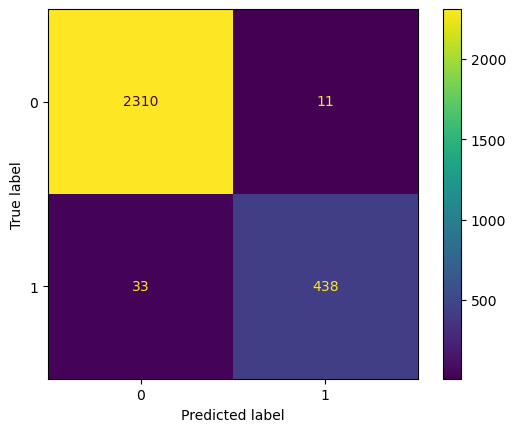

In [134]:
# Confusion Matrix
cm= metrics.confusion_matrix(y_test, y_pred)

disp= metrics.ConfusionMatrixDisplay(cm, display_labels=xgb_cv.classes_)

disp.plot()
plt.show()

The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

The bottom left represents the false negatives and the top right represents the false positives.The presence of higher false negatives over false positives led to the higher precision scores but lower recall scores.

Overall, the model performed well with 0.962598 AUC score. Next, we will look into the feature importance to better understand the key features which differentiates leaving and not leaving employees.

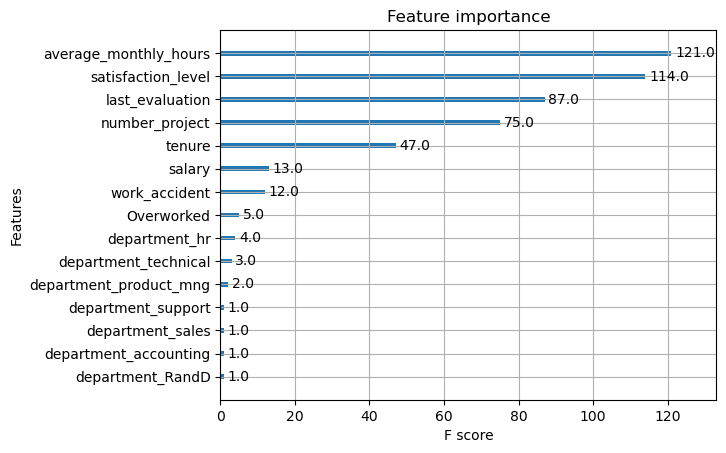

In [138]:
# Plot the relative feature importance of the predictor variables in the XGBoost model
plot_importance(xgb_cv.best_estimator_)
plt.show()

According to the plot, average monthly hours, satisfaction levels, evaluation, number of projects, and tenure occupies the top 5 highest importance among other features. It may be worth it to further investigate these features and how they affect an employee's decision to leave.

### Summary of model results

### Conclusion, Recommendations, Next Steps

To conclude, among the models built: Logistic Regression, Decision Tree, Random Forest, and XGBoost, XGBoost performed best on the validation data. The model was then tested on the test data and was able to maintain its performance with an F1 score of 95.22%, Accuracy score of 98.42%, Precision score of 97.55%, Recall score of 92.99%, and AUC score of 96.26%. 

The feature importance test shows that the top 5 factors determining whether employees leave or not are:
- average monthly hours
- satisfaction levels
- evaluation score
- number of projects
- tenure 

Based on the insights gained from the analysis, below are several recommendations that could help with retaining employees:
* Cap the number of projects an employee can take to control hours worked.
* Ensure that employees are aware of the company's expectations of workload and time off, and any policies regarding overtimes so that employees who are working more than required can be rewarded accordingly to minimize any feelings of dissatisfaction towards the company from a perception of lack of recognition.
* Consider prioritizing employees who worked longer hours AND efficiently are justly given high evaluation if deserved. Do not simply give high evaluations to employees who work long hours but is inefficient.
* Consider promoting employees who have been working for the company for a long time (>= 4 years) or conduct a deeper investigation around employees who are in their 4th year of tenure to reveal the reason for low satisfaction rates in 4th-5th year.
* Conduct a company-wide survey or hold a team meeting, department meeting, and company meeting to understand employees' perception on the company's work culture, ethics, and other specific areas that may contribute to satisfaction levels.

Next Steps:
- Take into account the possibility of data leakage. Some features such as last evaluation and satisfaction levels may not be available at all times as these data may only be collected every few months. To solve this issue, we can do either of the following actions:
    * Schedule the model predictions only at certain times of the year when all data are readily available.
    * Create another model to exclude these features and evaluate its performance. These features may provide valuable insights and predictive capability to the model, but in case of data leakage it is worth to have another model which can perform well without them.
- It may also be worth to try building other models such as k-mean clustering to cluster this data and possibly uncover more insights.